Site to Database: https://www.ncbi.nlm.nih.gov/geo/

Load packages

In [67]:
library(Biobase)
library(GEOquery)
library(limma)
library(repr)
library(edgeR)

## Investigate normalization for **GSE39939**

In [154]:
gsms <- paste0("1111111111XXXXXXXXXXXXXXXXXXXXXXXXXXXXX11111111111",
        "11111111111111XXXXXXXXXXXXXXXXXXXXXXXXXX0000000000",
        "0000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXX")
GSE_ID <- "GSE39939"
microarray_platform <- "GPL10558"
labels = c("LTBI","ATB")

Found 1 file(s)
GSE39939_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


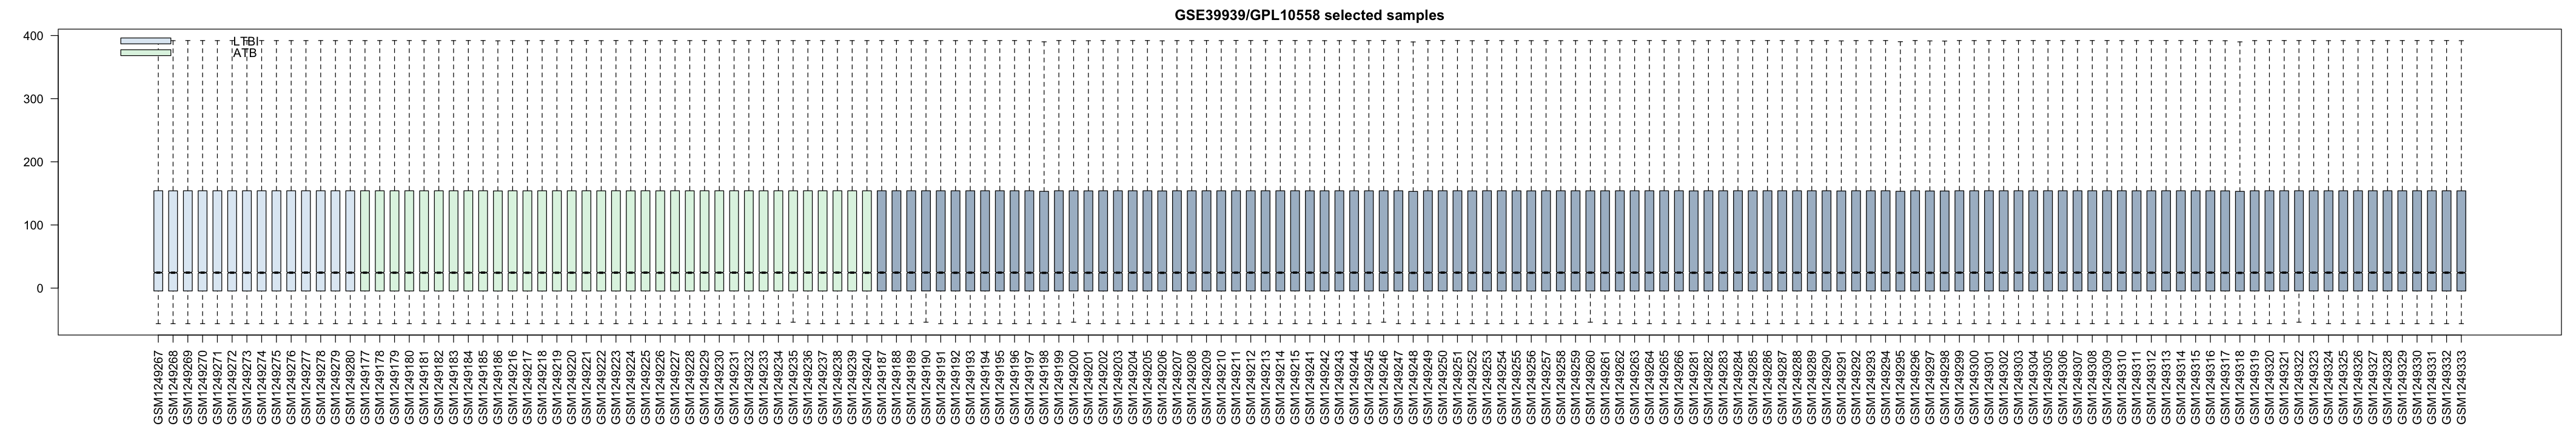

In [155]:
# Boxplot for selected GEO samples

# load series and platform data from GEO
gset <- getGEO(GSE_ID, GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep(microarray_platform, attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)

# set parameters and draw the plot
palette(c("#dfeaf4","#dff4e4", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste (GSE_ID, '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

In [157]:
head(exprs(gset))

,GSM1249177,GSM1249178,GSM1249179,GSM1249180,GSM1249181,GSM1249182,GSM1249183,GSM1249184,GSM1249185,GSM1249186,...,GSM1249324,GSM1249325,GSM1249326,GSM1249327,GSM1249328,GSM1249329,GSM1249330,GSM1249331,GSM1249332,GSM1249333
ILMN_1343291,56090.300000,54686.54000,47887.3300000,47425.190000,56884.670000,52112.590000,59795.220000,49529.23000,60433.0500000,47425.190000,...,55823.810000,59795.2200000,59197.0400000,59795.220000,58686.3100000,59795.220000,58686.31000,59197.040000,58686.310000,52320.640000
ILMN_1343295,9432.691000,8607.22000,8757.2860000,8217.430000,9561.019000,12440.450000,8008.929000,11382.99000,8532.6040000,11183.870000,...,7730.908000,5096.5180000,6926.9630000,6837.280000,7531.7180000,7609.974000,8172.31200,5522.370000,6827.480000,6540.210000
ILMN_1651199,-25.820540,-17.07241,-1.6534550,9.894567,-29.236380,-11.723950,-15.510830,-13.83961,-14.7234600,-10.946700,...,-29.847800,-12.6169800,-15.1498400,2.139383,-8.4139390,-19.768930,-24.05072,-36.371270,-13.604890,-18.587830
ILMN_1651209,44.164280,37.82935,33.4215400,42.681790,67.979250,53.915270,96.854720,67.07977,60.9076300,31.179750,...,52.745920,55.3108400,65.5634500,52.529210,26.3439800,91.109170,63.98153,110.736400,58.771380,100.154200
ILMN_1651210,8.129419,-10.01733,-0.4239364,-3.839604,-3.535796,-1.830596,-1.538258,21.87158,-0.5164982,-3.130452,...,-3.136033,0.1789948,0.8427415,-3.343995,0.4856742,2.678832,10.08747,8.755813,-7.490610,-17.674760
ILMN_1651221,5.301095,30.99497,34.1231300,40.328840,16.396110,13.405530,13.238200,21.24349,26.1781300,-1.196192,...,25.378720,23.6095400,20.5367500,17.261730,21.0721000,23.327190,36.87263,27.942270,7.940698,8.347657


In [158]:
tail(exprs(gset))

,GSM1249177,GSM1249178,GSM1249179,GSM1249180,GSM1249181,GSM1249182,GSM1249183,GSM1249184,GSM1249185,GSM1249186,...,GSM1249324,GSM1249325,GSM1249326,GSM1249327,GSM1249328,GSM1249329,GSM1249330,GSM1249331,GSM1249332,GSM1249333
ILMN_3311165,91.173170,58.126440,81.177540,62.175440,113.939700,55.266140,91.31841,102.0498000,56.747350,134.486900,...,82.413700,86.859850,51.933170,66.725400,66.218270,101.833900,76.272730,74.639180,70.913700,135.177000
ILMN_3311170,5.886658,2.639124,-10.271820,-10.033190,-12.496230,-17.623270,-23.83045,-8.3452210,-4.216139,8.255477,...,-21.502180,-8.174335,-3.424918,-13.742130,-9.258091,-1.714453,-13.494550,-10.563180,-12.399880,-4.123542
ILMN_3311175,-11.629960,2.592417,11.177460,16.105520,-1.853015,14.274730,-14.46039,-0.7077051,-1.941310,16.779960,...,-1.490271,-3.188275,-13.852190,-15.923870,-6.656165,8.435421,1.977916,6.011567,-5.459602,6.654830
ILMN_3311180,7.023132,23.615980,1.579852,4.758029,45.774500,30.006240,32.79173,7.0544530,20.007160,21.383080,...,17.167100,40.091490,24.510780,-8.068623,9.788155,27.515400,10.800970,10.766070,11.152530,29.687030
ILMN_3311185,25.159000,15.505610,6.726044,7.120516,27.057580,-6.673428,48.65555,14.5666400,-1.398044,13.537870,...,19.552760,-5.977802,15.100500,-3.820853,11.192980,21.098140,10.675530,15.395460,19.271600,24.941800
ILMN_3311190,76.949340,16.205950,146.327400,199.840400,79.975490,171.523200,81.60543,105.7333000,55.446400,68.151050,...,32.078510,60.534420,69.821370,47.327070,38.080470,32.222370,52.292040,35.924420,43.266800,44.711090


## Investigate normalization for **GSE39940**

In [159]:
gsms <- paste0("11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111111111",
        "11111111111000000000000000000000000000000000000000",
        "000000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
GSE_ID <- "GSE39940"
microarray_platform <- "GPL10558"
labels <- c("LTBI","ATB")

Found 1 file(s)
GSE39940_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


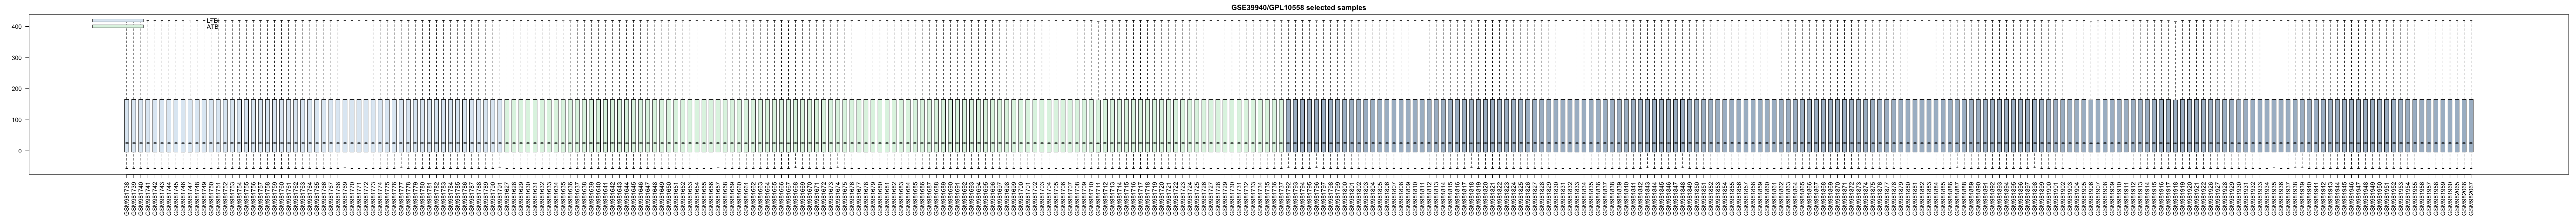

In [160]:
# Boxplot for selected GEO samples

# load series and platform data from GEO
gset <- getGEO(GSE_ID, GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep(microarray_platform, attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)

# set parameters and draw the plot
palette(c("#dfeaf4","#dff4e4", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste (GSE_ID, '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

In [161]:
head(exprs(gset))

,GSM981627,GSM981628,GSM981629,GSM981630,GSM981631,GSM981632,GSM981633,GSM981634,GSM981635,GSM981636,...,GSM981954,GSM981955,GSM981956,GSM981957,GSM981958,GSM981959,GSM981960,GSM982065,GSM982066,GSM982067
ILMN_1343291,56308.110000,64660.570000,52680.860000,60659.600000,45778.350000,65895.970000,59857.980000,51845.200000,52022.180000,53645.95000,...,61979.8900000,50514.380000,60659.60000,55586.110000,49545.780000,61265.520000,61979.89000,54754.05000,55745.7700000,61604.040000
ILMN_1343295,9724.363000,10782.370000,8186.232000,8144.812000,8828.083000,10327.980000,10677.270000,12547.090000,13452.000000,9934.53700,...,9282.8320000,13278.720000,14015.89000,12347.670000,15616.820000,9017.847000,11170.72000,11968.19000,9681.8440000,7856.802000
ILMN_1651199,-7.218733,-10.133900,17.316970,-31.683640,-4.763963,-13.485030,-6.823708,-7.392095,2.251411,-14.16892,...,-8.8568770,-19.479870,-38.18792,-1.677235,-7.763180,-29.368230,-20.32080,-19.67744,-11.2468500,2.149307
ILMN_1651209,78.597080,82.402280,86.575830,66.439510,89.016490,70.575490,36.727120,44.860410,65.226300,44.13154,...,80.9875300,70.474560,89.14114,70.528020,52.149860,75.818360,72.22909,49.19080,53.1275100,57.753710
ILMN_1651210,1.983013,7.534446,-5.700916,5.181851,-6.158038,-1.019995,5.521286,4.142940,-3.406567,15.23557,...,-0.7357864,-6.032352,-10.77997,-10.842560,-8.800418,-9.335608,20.94307,-11.77663,0.1119454,-8.073057
ILMN_1651221,18.145030,20.621820,-6.208327,13.066010,32.113520,15.898540,56.218070,15.094670,33.378790,30.71956,...,42.2453800,22.033810,38.79971,38.630960,24.703310,23.059240,20.96876,25.44160,3.2682410,12.749590


In [162]:
tail(exprs(gset))

,GSM981627,GSM981628,GSM981629,GSM981630,GSM981631,GSM981632,GSM981633,GSM981634,GSM981635,GSM981636,...,GSM981954,GSM981955,GSM981956,GSM981957,GSM981958,GSM981959,GSM981960,GSM982065,GSM982066,GSM982067
ILMN_3311165,166.471900,80.259590,78.609830,73.1054300,83.293680,67.341440,72.894170,88.1851200,207.4062000,249.081100,...,48.3882000,55.172260,17.427870,57.02277000,85.169500,48.604750,55.3867900,69.5882700,78.529520,87.4252600
ILMN_3311170,3.418679,-16.385400,-28.498360,-3.5753830,-27.301520,8.690154,-13.481290,-0.6070501,-1.5313030,-17.144140,...,-4.0727880,-10.737720,-20.763330,8.45713400,-5.570818,-24.071180,-0.3537732,-5.8321770,-8.367224,-2.4094360
ILMN_3311175,-18.020360,-4.526051,-11.463600,-3.6464990,-13.519270,11.931620,-9.597625,-5.1397730,0.4776597,-8.227179,...,5.0724170,-6.678411,-10.905730,0.04960922,8.919609,3.648792,-9.2923830,-14.9044200,6.909142,0.8267608
ILMN_3311180,24.664120,19.897270,-1.051237,8.4368720,6.488198,14.773880,4.160088,21.0503100,7.2591050,5.246597,...,20.7586900,45.035420,17.082160,6.68653200,29.716380,5.405383,5.7981890,0.7878754,25.731340,22.3572800
ILMN_3311185,19.796330,10.300740,13.046150,-0.9094016,6.100151,1.505065,-2.708560,-6.8105860,30.2803200,28.734860,...,-0.2431752,12.767580,-4.827763,6.81786200,14.539650,-5.611349,13.8267000,23.7094800,11.640890,16.8730700
ILMN_3311190,91.832470,80.629360,69.806140,163.2513000,94.943820,33.694030,42.646210,64.6985200,97.1596300,136.237700,...,41.5265300,76.196400,69.337960,96.15265000,68.766200,59.049170,75.7174100,103.6898000,85.054140,73.3940000


## Investigate normalization for **GSE69581**

From paper: 

Esmail H, Lai RP, Lesosky M, Wilkinson KA et al. Complement pathway gene activation and rising circulating immune complexes characterize early disease in HIV-associated tuberculosis. Proc Natl Acad Sci U S A 2018 Jan 30;115(5):E964-E973. PMID: 29339504

Microarray Data Analysis. Raw background subtracted expression data were normalized using GeneSpring GX version 12.6 (Agilent). For each sample, probes were assigned a signal intensity detection P value in comparison with background hybridization, and probes were assigned a present flag using a 0.99 cutoff. Raw signal values <1 were then set to a threshold of 1 and all values were log2 transformed. To minimize technical variation, each sample was then normalized using a 75th percentile shift algorithm in which the log2-transformed intensity value corresponding to the 75th percentile was subtracted from log2-transformed intensity value for each probe within a sample. Baseline transformation was then carried out to rescale intensity values to the median of all samples. Samples were visualized using principal component analysis (PCA) to confirm no outliers. Following this, probes that were not present in at least 10% of samples were filtered out before further analysis.

...

The raw and normalized microarray data have been deposited in GEO (GSE69581).

# **RNA-seq Data Differential Expression Analysis Development**

Specify directory where RNA-seq Data is stored

In [18]:
RNAseq_counts_data <- "/Users/rogervargas/OneDrive - Bill & Melinda Gates Medical Research Institute/Projects/Biomarkers/Data/RNAseq Datasets/"

Specify directory for where to store Differential Gene Expression Data

In [106]:
RNAseq_diff_exp_data <- "/Users/rogervargas/OneDrive - Bill & Melinda Gates Medical Research Institute/Projects/Biomarkers/Data/RNAseq Differential Gene Expression/test/"

## GSE84076 Brazil, >18 year-old  (Sequencing, GPL16791)

- Subjects:36
- Disease status: Active Tuberculosis (n=6), Treated Active Tuberculosis (n=2), Latent Tuberculosis - BCG - Unvaccinated/vaccinated (n=16) and Control - BCG - Unvaccinated/vaccinated (n=12)
- Disease status definition: using Cufflinks for normalization
- rawcount = *no*

Compare ATB (**n=8**) to LTBI (**n=16**)

In [166]:
GSE_ID = "GSE84076"
gsms <- "110000000000000000XXXXXXXXXXXX111111"
counts_filename <- "GSE84076_ExpressionDataMatrix.csv"

#read in counts matrix
countsMatrix_filepath <- paste0(RNAseq_counts_data, counts_filename)
countsMatrix_full <- read.csv(file = countsMatrix_filepath) #retrieve full counts matrix

annotation <- countsMatrix_full$gene_id #store gene ids
countsMatrix <- countsMatrix_full[2:37] #select columns that correspond to samples

num_samples <- 8 + 16

In [167]:
#convert counts matrix to a dataframe
countsMatrix <- as.data.frame(countsMatrix)

#construct design matrix
group <- vector()
for (sample_i in strsplit(gsms, "")[[1]]) {
    if (sample_i == '0') {
        group <- c(group, 1)
    }
    else if (sample_i == '1') {
        group <- c(group, 2)
    }
}
group <- factor(group)
design <- model.matrix(~ group + 0)

# group names for all samples
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
countsMatrix <- countsMatrix[ ,sel]

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names

# rename columns of design matrix to match group names
colnames(design) <- levels(as.factor(sml)) 

# Put the counts, groups, and annotation into a 'DGEList' object 
x <- DGEList(counts=countsMatrix, group=sml, genes=annotation)

# TMM Normalization (use if counts matrix not already normalized)
#x <- calcNormFactors(x)

# Filter out genes that don't have at least 1 count-per-million in at least number of samples / 2
isexpr <- rowSums(cpm(x) > 1) >= num_samples / 2
x <- x[isexpr,]

# Run voom
voomResults <- voom(x,design)

#Run limma
fit <- lmFit(voomResults, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

#save results
write.csv(tT, paste0(RNAseq_diff_exp_data , GSE_ID, '.csv'))

In [168]:
head(tT)

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
1,1/2-SBSRNA4,-0.33043197,0.8570799,-1.4835788,0.14935896,0.4280862,-4.675118
2,A1BG,-0.35772337,0.8386317,-1.9315008,0.06384855,0.3047824,-4.058432
3,A1BG-AS1,-0.28535836,1.2002840,-1.4938090,0.14667856,0.4249595,-4.677392
5,A2LD1,-0.09101315,2.3958798,-0.7222738,0.47625951,0.7270167,-5.503504
13,AAAS,-0.20575199,4.2215197,-1.6167558,0.11741336,0.3849990,-4.707541
14,AACS,-0.14807512,2.5705003,-1.1362829,0.26570096,0.5574584,-5.169337


## GSE101705  South Indian cohort  (Sequencing, GPL18573)

- Subjects:44
- Disease status: TB (n=28), latent TB infection (n=16)
- Disease status definition: DEseq2 normalization
- rawcount = *no*

Compare ATB (**n=28**) to LTBI (**n=16**)

In [163]:
GSE_ID = "GSE101705"
gsms <- "11111111111111110000000000000000111111111111"
counts_filename <- "GSE101705_normalizedCounts.csv"

#read in counts matrix
countsMatrix_filepath <- paste0(RNAseq_counts_data, counts_filename)
countsMatrix_full <- read.csv(file = countsMatrix_filepath) #retrieve full counts matrix

annotation <- countsMatrix_full$X #store gene ids
countsMatrix <- countsMatrix_full[2:45] #select columns that correspond to samples

num_samples <- 28 + 16

In [164]:
#convert counts matrix to a dataframe
countsMatrix <- as.data.frame(countsMatrix)

#construct design matrix
group <- vector()
for (sample_i in strsplit(gsms, "")[[1]]) {
    if (sample_i == '0') {
        group <- c(group, 1)
    }
    else if (sample_i == '1') {
        group <- c(group, 2)
    }
}
group <- factor(group)
design <- model.matrix(~ group + 0)

# group names for all samples
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
countsMatrix <- countsMatrix[ ,sel]

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names

# rename columns of design matrix to match group names
colnames(design) <- levels(as.factor(sml)) 

# Put the counts, groups, and annotation into a 'DGEList' object 
x <- DGEList(counts=countsMatrix, group=sml, genes=annotation)

# TMM Normalization (use if counts matrix not already normalized)
#x <- calcNormFactors(x)

# Filter out genes that don't have at least 1 count-per-million in at least number of samples / 2
isexpr <- rowSums(cpm(x) > 1) >= num_samples / 2
x <- x[isexpr,]

# Run voom
voomResults <- voom(x,design)

#Run limma
fit <- lmFit(voomResults, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

#save results
write.csv(tT, paste0(RNAseq_diff_exp_data , GSE_ID, '.csv'))

In [165]:
head(tT)

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
3,ATRX,-0.7057955,6.438015,-3.679241,6.001854e-04,1.918190e-03,-0.6415614
5,TCOF1,-0.8067688,5.555353,-6.429341,5.966408e-08,5.367246e-06,8.1786608
6,NSRP1,-0.2716467,4.048355,-2.140425,3.753001e-02,6.041694e-02,-4.2892019
7,SPPL3,-0.3401170,5.658911,-4.440034,5.411130e-05,2.983245e-04,1.6491145
8,OPA3,-0.2565091,4.943098,-2.690859,9.832928e-03,1.918232e-02,-3.1654857
9,OPA1,-0.6294738,5.571743,-3.262138,2.060805e-03,5.127527e-03,-1.7701385
